## ANALISIS EXPLORATORIO (EDA)

In [1]:
import kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# !mkdir ./peliculas
# kaggle.api.dataset_download_files('alanvourch/tmdb-movies-daily-updates', path='peliculas', unzip=True)

In [3]:
# Cargar el dataset
df = pd.read_csv('peliculas/TMDB_all_movies.csv',parse_dates=['release_date'])

# Mostrar información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")

Dimensiones del dataset: (1151484, 28)

Primeras filas:
   id                             title  vote_average  vote_count    status  \
0   2                             Ariel           7.1       356.0  Released   
1   3               Shadows in Paradise           7.3       426.0  Released   
2   5                        Four Rooms           5.9      2780.0  Released   
3   6                    Judgment Night           6.5       360.0  Released   
4   8  Life in Loops (A Megacities RMX)           7.2        30.0  Released   

  release_date     revenue  runtime      budget    imdb_id  ...  \
0   1988-10-21         0.0     73.0         0.0  tt0094675  ...   
1   1986-10-17         0.0     74.0         0.0  tt0092149  ...   
2   1995-12-09   4257354.0     98.0   4000000.0  tt0113101  ...   
3   1993-10-15  12136938.0    109.0  21000000.0  tt0107286  ...   
4   2006-01-01         0.0     80.0     42000.0  tt0825671  ...   

                         spoken_languages  \
0                    

In [4]:
# chequeo de llave unica 
print(df.id.is_unique)

True


In [5]:
# primeras peliculas
df.title.head(5)

0                               Ariel
1                 Shadows in Paradise
2                          Four Rooms
3                      Judgment Night
4    Life in Loops (A Megacities RMX)
Name: title, dtype: object

In [6]:
# numero de peliculas sin titulos
print(df.title.isnull().sum())

15


In [7]:
# estadisticas descriptivas de la votación promedio de las peliculas 
df['vote_average'].describe()

count    1.151484e+06
mean     2.014323e+00
std      3.059167e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      1.000000e+01
Name: vote_average, dtype: float64

In [8]:

num_movies_zero_note = (df['vote_average'] == 0.0).sum()
print(f"Número de películas con vote_average=0.0: {num_movies_zero_note}")

# Vemos que la variable 'vote_average' tiene mas del 50% de valores iguales a cero. Lo que parece indicar que este valor se le puso a las películas sin nota.

Número de películas con vote_average=0.0: 764302


In [9]:
num_movies_zero_count = (df['vote_count'] == 0.0).sum()
print(f"Número de películas con vote_count=0.0: {num_movies_zero_count}")
# Parece ser que la columna 'vote_count' también tiene muchos valores en cero, lo que refuerza la idea de que muchas películas no han sido votadas.

Número de películas con vote_count=0.0: 763815


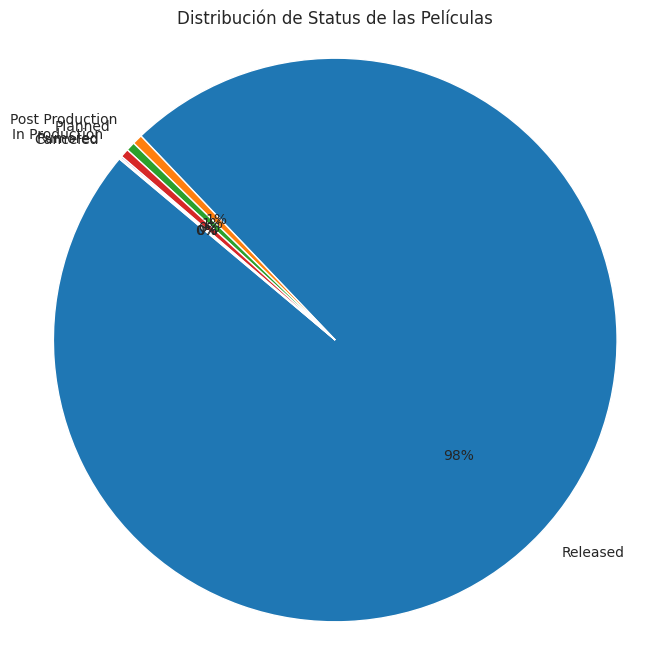

In [10]:
# Gráfico de torta para la variable 'status'
status_counts = df['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Distribución de Status de las Películas')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

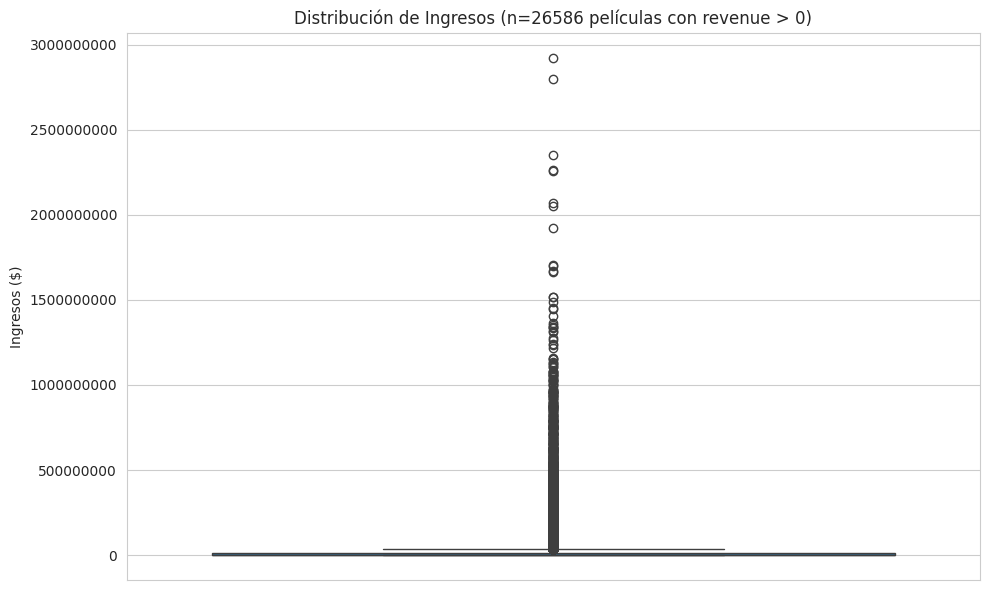

Películas con revenue > 0: 26586
Películas con revenue = 0: 1124897


In [11]:
# Filtrar películas con revenue > 0
df_revenue = df[df['revenue'] > 0]

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_revenue['revenue'])
plt.title(f'Distribución de Ingresos (n={len(df_revenue)} películas con revenue > 0)')
plt.ylabel('Ingresos ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

print(f"Películas con revenue > 0: {len(df_revenue)}")
print(f"Películas con revenue = 0: {(df['revenue'] == 0).sum()}")

In [12]:
# Obtener el top 10 de películas con mayores ingresos
top_10_revenue = df_revenue.sort_values(by='revenue', ascending=False).head(10)
print(top_10_revenue[['title', 'revenue']])

                               title       revenue
12039                         Avatar  2.923706e+09
182765             Avengers: Endgame  2.799439e+09
53755       Avatar: The Way of Water  2.353096e+09
471                          Titanic  2.264162e+09
690728                      Ne Zha 2  2.259822e+09
88729   Star Wars: The Force Awakens  2.068224e+09
182767        Avengers: Infinity War  2.052415e+09
445066       Spider-Man: No Way Home  1.921847e+09
760266                    Zootopia 2  1.703000e+09
719051                  Inside Out 2  1.698864e+09


In [13]:
# Filtrar películas con duración > 0
mask = df['runtime'] > 0
df.loc[mask, 'runtime'].describe()

count    886478.000000
mean         57.537932
std          56.371510
min           1.000000
25%          13.000000
50%          57.000000
75%          90.000000
max       14400.000000
Name: runtime, dtype: float64

In [14]:
# Se aprecia que la base de datos contiene un % significativo de películas que debiesen considerar como un cortometraje 

In [15]:
df['budget'].describe()
# ¿ Serán las películas con presupuesto cero grabadas con un celular o cámara casera ?

count    1.151484e+06
mean     2.818830e+05
std      4.706109e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.839000e+08
Name: budget, dtype: float64

In [16]:
 # Número de películas con un ID de IMDb válido
print(df['imdb_id'].notna().sum())
# podriamos considerar que las peliculas sin imdb_id son de baja calidad o producciones caseras, a la hora de querer definir un filtro para un modelo de recomendación este seria un buen criterio

649320


<Axes: xlabel='original_language'>

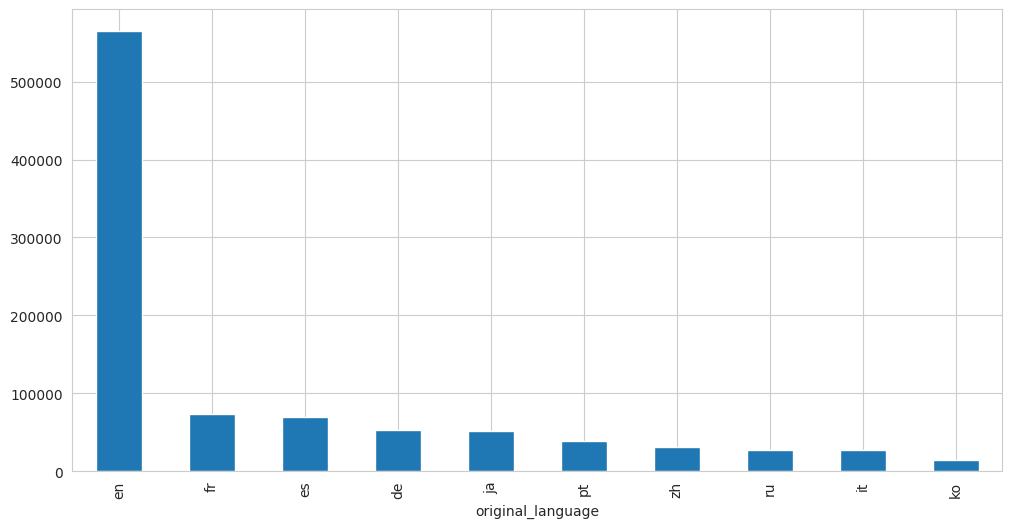

In [17]:
# Distribución del lenguaje original de las películas
df['original_language'].value_counts().head(10).plot(kind='bar')


In [18]:
# metrica de popularidad de TMDB
df['popularity'].describe() 

count    1.151484e+06
mean     8.550235e-01
std      1.826082e+00
min      0.000000e+00
25%      1.295000e-01
50%      6.000000e-01
75%      9.800000e-01
max      5.773256e+02
Name: popularity, dtype: float64

In [19]:
# Las peliculas pueden pertenecer a varios géneros  
df['genres'].head(10)  

0         Comedy, Drama, Romance, Crime
1                Comedy, Drama, Romance
2                                Comedy
3               Action, Crime, Thriller
4                           Documentary
5                                 Drama
6    Adventure, Action, Science Fiction
7                     Animation, Family
8                Comedy, Drama, Romance
9                                 Drama
Name: genres, dtype: object

In [20]:
# Numero de peliculas producidas por país
df['production_countries'].value_counts()

production_countries
United States of America                         165489
Japan                                             43326
United Kingdom                                    41936
France                                            39750
Germany                                           35378
                                                  ...  
Germany, United Kingdom, Syrian Arab Republic         1
Spain, United States of America, Yugoslavia           1
Burkina Faso, Argentina, Germany                      1
Belarus, Russia, Serbia                               1
Italy, United Kingdom, Germany, Belgium               1
Name: count, Length: 12688, dtype: int64

In [21]:
df['spoken_languages'].value_counts()

spoken_languages
English                                   232827
Español                                    47813
日本語                                        44077
Français                                   42928
No Language                                42831
                                           ...  
Bamanankan, Italiano, Kiswahili, தமிழ்         1
العربية, Deutsch, Italiano                     1
ქართული, Pусский, Slovenčina                   1
اردو, English, Español, Kiswahili              1
Français, English, Nederlands, Deutsch         1
Name: count, Length: 7557, dtype: int64

In [22]:
df['director'].value_counts()

director
Dave Fleischer                             622
D.W. Griffith                              448
Kevin Dunn                                 439
Gérard Courant                             433
Gilbert M. Anderson                        372
                                          ... 
Lena Kocutar                                 1
Juan Mateo Menendez, Cassandra Gardiner      1
Bigum, Björge                                1
Rihards Gēcis, Juris Matuzelis, Gustavo      1
Matthew Bernet, Gabin Berthelot              1
Name: count, Length: 398928, dtype: int64

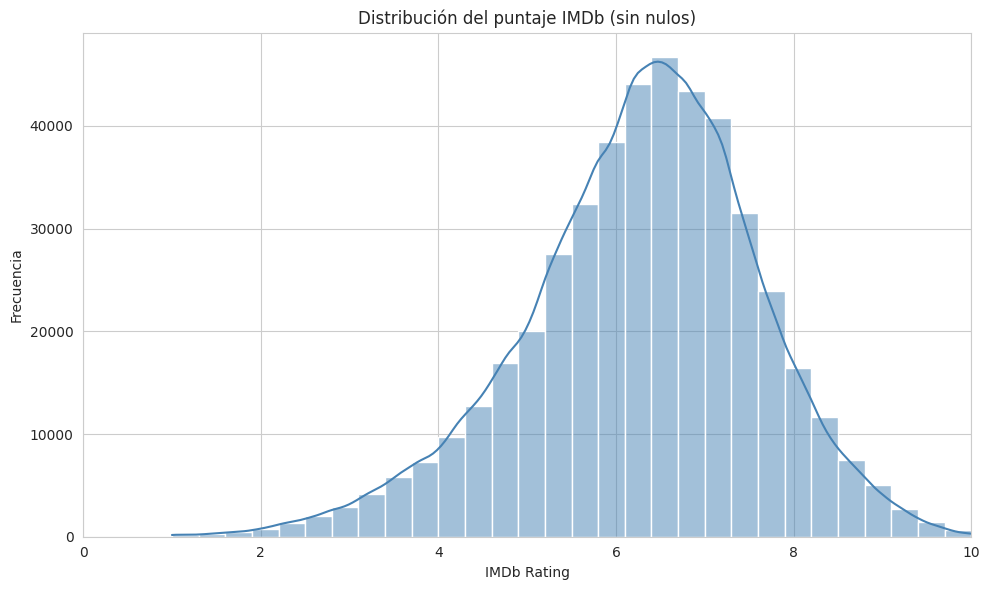

In [23]:
# Gráfico de la distribución del puntaje IMDb filtrando valores nulos
imdb_scores = df['imdb_rating'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(imdb_scores, bins=30, kde=True, color='steelblue')
plt.title('Distribución del puntaje IMDb (sin nulos)')
plt.xlabel('IMDb Rating')
plt.ylabel('Frecuencia')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()
# una variable bastante util para utilizar en un modelo de recomendación

In [24]:
# # Filtrar imdb_votes: eliminar nulos y ceros
# zeros = (df['imdb_votes'] == 0).sum()
# nulos = df['imdb_votes'].isna().sum()
# votes = df['imdb_votes'].dropna()
# votes = votes[votes > 0]
# votes.describe()
# # la mitad de las peliculas puntuadas tienen menos de 60 votos en IMDb

In [25]:
# queremos crear un sistema de recomendación de películas, que utilice la informacion de resumen de la trama e información del genero,director y año.
# por lo tanto se utilizara como criterio de filtrado que las películas tengan un resumen de su trama, esta información esta capturada en la variable 'overview'.
# utilizaremos neo4j como base y motor de consultas para el sistema de recomendación.

In [26]:
df_filtered = df[df['overview'].notna() & (df['overview'] != '')]
print(f"Número de películas con resumen de trama disponible: {len(df_filtered)}")   

Número de películas con resumen de trama disponible: 975686


In [27]:
# Limpiar caracteres problemáticos en el campo overview de df_filtered
df_filtered['overview'] = df_filtered['overview'].str.replace('/', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('\\', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('"', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('"', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('|','' ,regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('||','', regex=False)


/tmp/ipykernel_29650/1996568439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['overview'] = df_filtered['overview'].str.replace('/', '', regex=False)
/tmp/ipykernel_29650/1996568439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['overview'] = df_filtered['overview'].str.replace('\\', '', regex=False)
/tmp/ipykernel_29650/1996568439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [28]:
df_filtered["cast_list"] = df_filtered["cast"].str.split(",")

/tmp/ipykernel_29650/586980632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["cast_list"] = df_filtered["cast"].str.split(",")


In [29]:
df_filtered["director_list"] = df_filtered["director"].str.split(",")

/tmp/ipykernel_29650/2916400597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["director_list"] = df_filtered["director"].str.split(",")


In [30]:
df_filtered.loc[:,["cast","cast_list"]].head(5)


,cast,cast_list
0,"Susanna Haavisto, Pentti Auer, Olli Varja, Mer...","[Susanna Haavisto, Pentti Auer, Olli Varja, ..."
1,"Helmeri Pellonpää, Ulla Kuosmanen, Marina Mart...","[Helmeri Pellonpää, Ulla Kuosmanen, Marina M..."
2,"Lili Taylor, Kimberly Blair, Quinn Hellerman, ...","[Lili Taylor, Kimberly Blair, Quinn Hellerma..."
3,"Doug Wert, Angela Alvarado, Everlast, Sean O'G...","[Doug Wert, Angela Alvarado, Everlast, Sean..."
4,NaN,NaN


In [31]:
df_filtered.dtypes

id                                  int64
title                              object
vote_average                      float64
vote_count                        float64
status                             object
release_date               datetime64[ns]
revenue                           float64
runtime                           float64
budget                            float64
imdb_id                            object
original_language                  object
original_title                     object
overview                           object
popularity                        float64
tagline                            object
genres                             object
production_companies               object
production_countries               object
spoken_languages                   object
cast                               object
director                           object
director_of_photography            object
writers                            object
producers                         

In [32]:
#df_filtered.to_csv('docker/import/movies_with_overview.csv',quoting=1, escapechar="\\", index=False)

In [33]:
df['overview'].head(5)

0    A Finnish man goes to the city to find a job a...
1    Nikander, a rubbish collector and would-be ent...
2    It's Ted the Bellhop's first night on the job....
3    Four young friends, while taking a shortcut en...
4    Timo Novotny labels his new project an experim...
Name: overview, dtype: object

In [34]:
# Obtener el tipo de datos de las columnas
df.dtypes

id                                  int64
title                              object
vote_average                      float64
vote_count                        float64
status                             object
release_date               datetime64[ns]
revenue                           float64
runtime                           float64
budget                            float64
imdb_id                            object
original_language                  object
original_title                     object
overview                           object
popularity                        float64
tagline                            object
genres                             object
production_companies               object
production_countries               object
spoken_languages                   object
cast                               object
director                           object
director_of_photography            object
writers                            object
producers                         

In [35]:
df_filtered['year']= df_filtered['release_date'].dt.year

/tmp/ipykernel_29650/3446247150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year']= df_filtered['release_date'].dt.year


In [36]:
df_filtered[['title','release_date','year']].head(5)

,title,release_date,year
0,Ariel,1988-10-21,1988.0
1,Shadows in Paradise,1986-10-17,1986.0
2,Four Rooms,1995-12-09,1995.0
3,Judgment Night,1993-10-15,1993.0
4,Life in Loops (A Megacities RMX),2006-01-01,2006.0


In [37]:
df_filtered["genres_list"]= df_filtered["genres"].str.split(",")

/tmp/ipykernel_29650/4271693754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["genres_list"]= df_filtered["genres"].str.split(",")


In [38]:
df_filtered.loc[:,["genres","genres_list"]].head(5)

,genres,genres_list
0,"Comedy, Drama, Romance, Crime","[Comedy, Drama, Romance, Crime]"
1,"Comedy, Drama, Romance","[Comedy, Drama, Romance]"
2,Comedy,[Comedy]
3,"Action, Crime, Thriller","[Action, Crime, Thriller]"
4,Documentary,[Documentary]


In [40]:
df_filtered.dtypes

id                                  int64
title                              object
vote_average                      float64
vote_count                        float64
status                             object
release_date               datetime64[ns]
revenue                           float64
runtime                           float64
budget                            float64
imdb_id                            object
original_language                  object
original_title                     object
overview                           object
popularity                        float64
tagline                            object
genres                             object
production_companies               object
production_countries               object
spoken_languages                   object
cast                               object
director                           object
director_of_photography            object
writers                            object
producers                         

In [41]:
df_filtered.to_csv('docker/import/movies_with_overview.csv',quoting=1, escapechar="\\", index=False,float_format="%.0f")